In [53]:
import json

# Read COCO format annotation file
with open("/Users/sakuramomoko/Desktop/Fish_counting/cfc_train.json", "r") as f:
    annotations = json.load(f)

# View the annotation structure
print(annotations.keys()) 


dict_keys(['images', 'categories', 'annotations'])


In [54]:
import json
import pandas as pd

# Read the annotation data of Source and Target
with open("/Users/sakuramomoko/Desktop/Fish_counting/cfc_train.json", "r") as f:
    source_data = json.load(f)

with open("/Users/sakuramomoko/Desktop/Fish_counting/cfc_channel_test.json", "r") as f:
    target_data = json.load(f)

# Extract images and annotations data
source_images = pd.DataFrame(source_data["images"])
source_annotations = pd.DataFrame(source_data["annotations"])
source_categories = pd.DataFrame(source_data["categories"])

target_images = pd.DataFrame(target_data["images"])
target_annotations = pd.DataFrame(target_data["annotations"])
target_categories = pd.DataFrame(target_data["categories"])

print(f"Source Images: {len(source_images)}, Source Annotations: {len(source_annotations)}, Source Categories: {len(source_categories)}")
print(f"Target Images: {len(target_images)}, Target Annotations: {len(target_annotations)}, Target Categories: {len(target_categories)}")


Source Images: 76619, Source Annotations: 132010, Source Categories: 1
Target Images: 13090, Target Annotations: 41761, Target Categories: 1


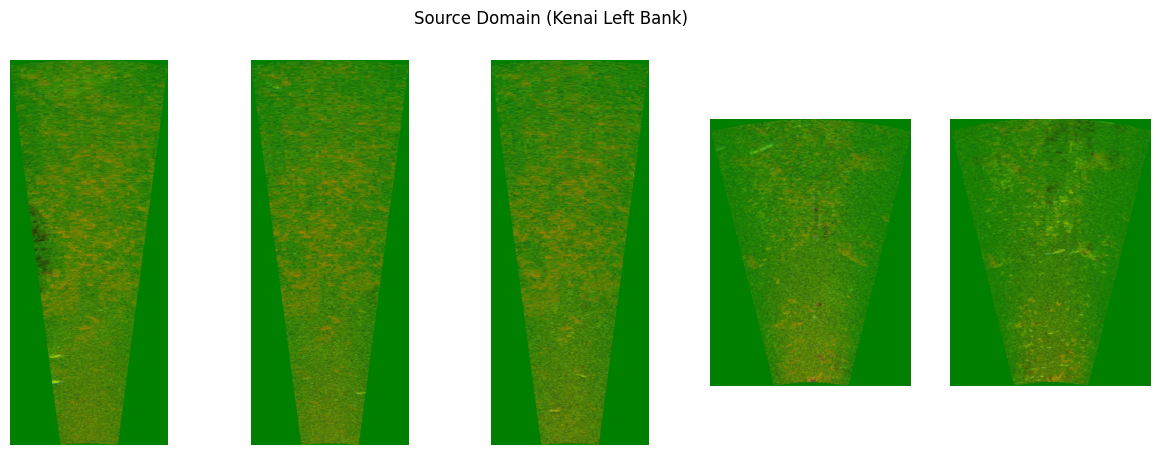

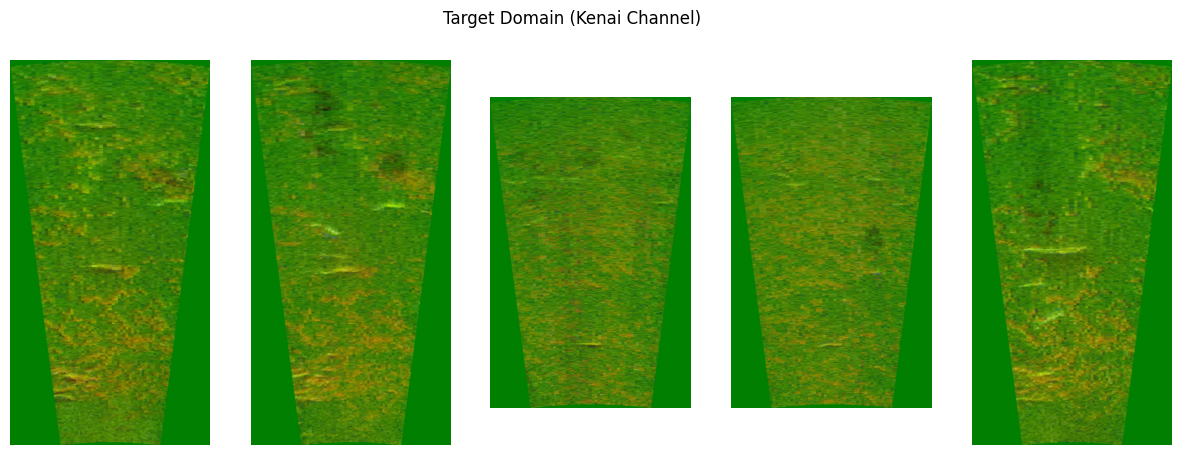

In [55]:
import cv2
import random
import matplotlib.pyplot as plt

# Example image of reading Source and Target
image_dir = "/Users/sakuramomoko/Desktop/Fish_counting/cfc_train/"
target_image_dir = "/Users/sakuramomoko/Desktop/Fish_counting/cfc_channel_test/"

def show_random_images(dir, images_df, title, num=5):
    fig, axes = plt.subplots(1, num, figsize=(15, 5))
    sample_images = random.sample(list(images_df["file_name"]), num)

    for i, img_name in enumerate(sample_images):
        img_path = dir + img_name
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axes[i].imshow(img)
        axes[i].axis("off")

    plt.suptitle(title)
    plt.show()

# Show images
show_random_images(image_dir, source_images, "Source Domain (Kenai Left Bank)")
show_random_images(target_image_dir, target_images, "Target Domain (Kenai Channel)")


In [56]:
import pandas as pd

# Dataset Basic Information
num_images = len(annotations["images"])
num_annotations = len(annotations["annotations"])
num_categories = len(annotations["categories"])

print(f"Total Images: {num_images}")
print(f"Total Annotations: {num_annotations}")
print(f"Total Categories: {num_categories}")


Total Images: 76619
Total Annotations: 132010
Total Categories: 1


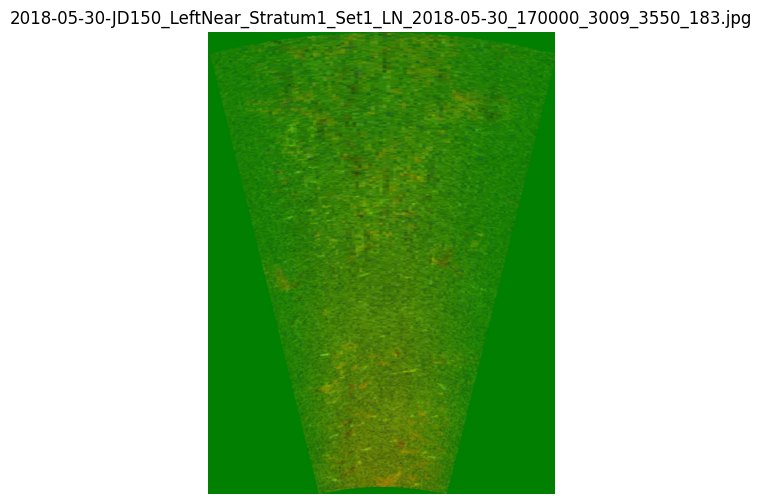

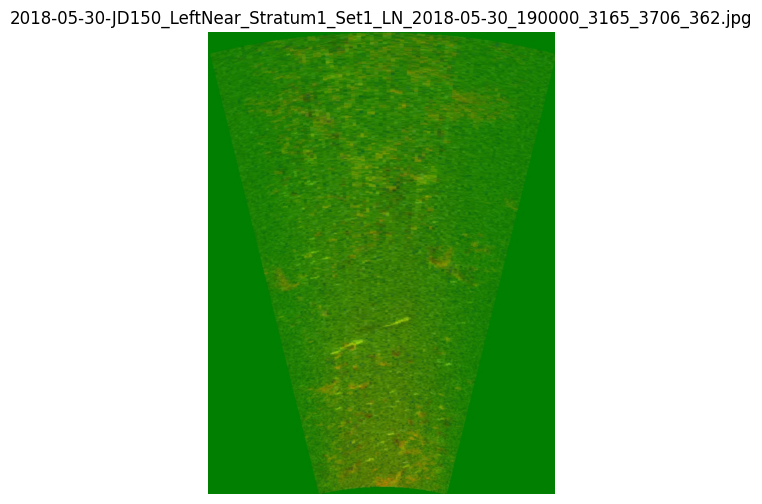

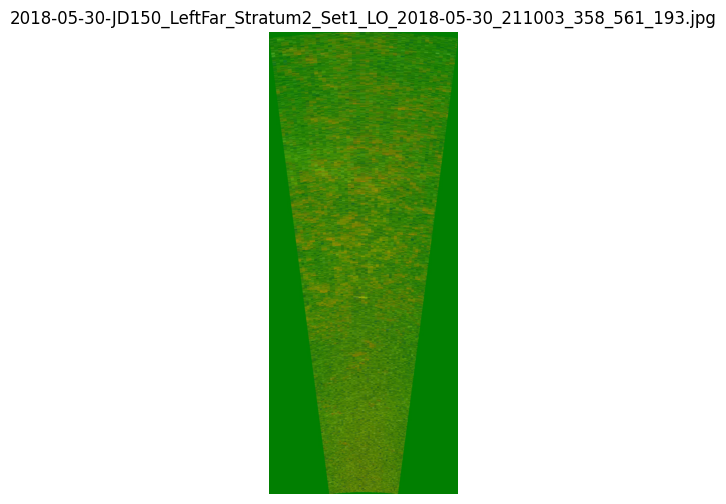

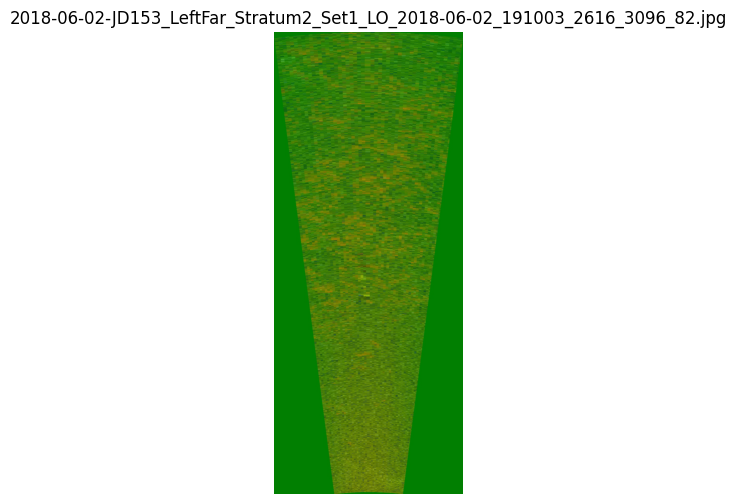

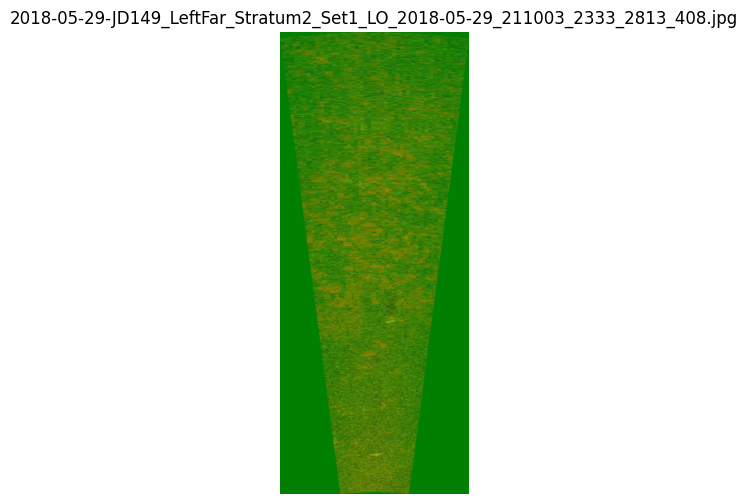

In [57]:
import matplotlib.pyplot as plt
import cv2
import random

# Randomly select a few pictures for visualization
image_dir = "/Users/sakuramomoko/Desktop/Fish_counting/cfc_train/"  
sample_images = random.sample(annotations["images"], 5)

for img_info in sample_images:
    img_path = image_dir + img_info["file_name"]
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(6,6))
    plt.imshow(img)
    plt.title(img_info["file_name"])
    plt.axis("off")
    plt.show()


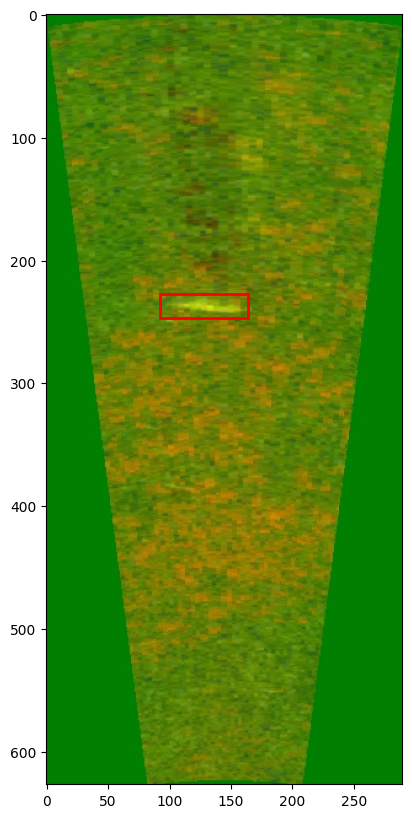

In [58]:
import matplotlib.patches as patches

def plot_image_with_boxes(image_id):
    img_info = next(img for img in annotations["images"] if img["id"] == image_id)
    img_path = image_dir + img_info["file_name"]
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    fig, ax = plt.subplots(1, figsize=(10, 10))
    ax.imshow(img)

    # Get the annotation of the current image
    bboxes = [ann for ann in annotations["annotations"] if ann["image_id"] == image_id]

    for bbox in bboxes:
        x, y, w, h = bbox["bbox"]
        rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor="r", facecolor="none")
        ax.add_patch(rect)

    plt.show()

# Select an image to visualize
plot_image_with_boxes(annotations["images"][0]["id"])


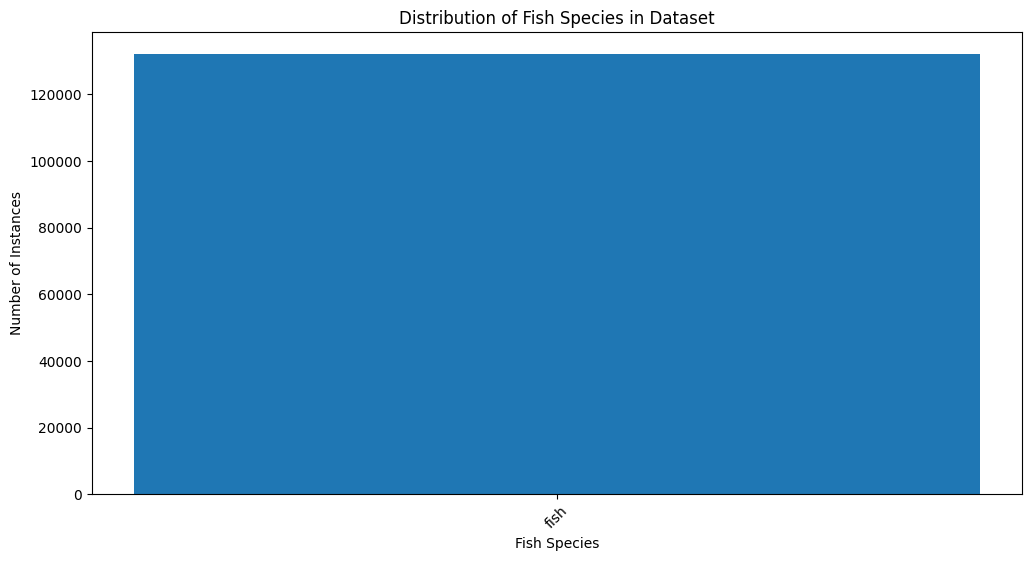

In [59]:
from collections import Counter

category_counts = Counter([ann["category_id"] for ann in annotations["annotations"]])
categories = {cat["id"]: cat["name"] for cat in annotations["categories"]}

category_counts_named = {categories[k]: v for k, v in category_counts.items()}

plt.figure(figsize=(12, 6))
plt.bar(category_counts_named.keys(), category_counts_named.values())
plt.xticks(rotation=45)
plt.xlabel("Fish Species")
plt.ylabel("Number of Instances")
plt.title("Distribution of Fish Species in Dataset")
plt.show()


Distribution of fish numbers in each image: [(60823, 20), (60826, 20), (60827, 20), (60828, 20), (60829, 20)]


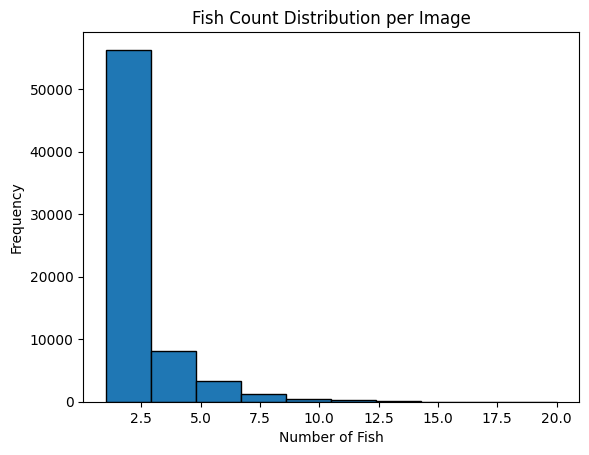

In [60]:
from collections import Counter

# Get the number of annotations in each image
image_counts = Counter([ann['image_id'] for ann in annotations['annotations']])
print("Distribution of fish numbers in each image:", image_counts.most_common(5))  # Check the number of annotations for the first 5 images

# Plotting a Histogram
import matplotlib.pyplot as plt
plt.hist(image_counts.values(), bins=10, edgecolor='black')
plt.title("Fish Count Distribution per Image")
plt.xlabel("Number of Fish")
plt.ylabel("Frequency")
plt.show()

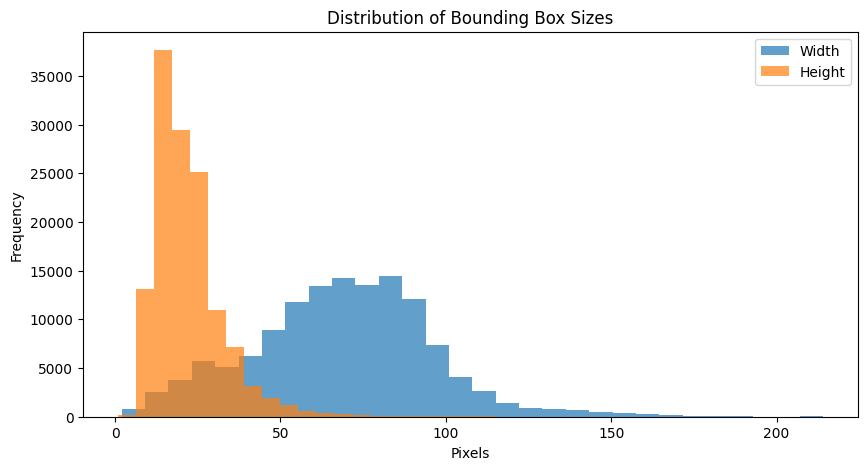

In [61]:
import numpy as np

bbox_dims = np.array([(ann["bbox"][2], ann["bbox"][3]) for ann in annotations["annotations"]])

plt.figure(figsize=(10,5))
plt.hist(bbox_dims[:,0], bins=30, alpha=0.7, label="Width")
plt.hist(bbox_dims[:,1], bins=30, alpha=0.7, label="Height")
plt.legend()
plt.xlabel("Pixels")
plt.ylabel("Frequency")
plt.title("Distribution of Bounding Box Sizes")
plt.show()


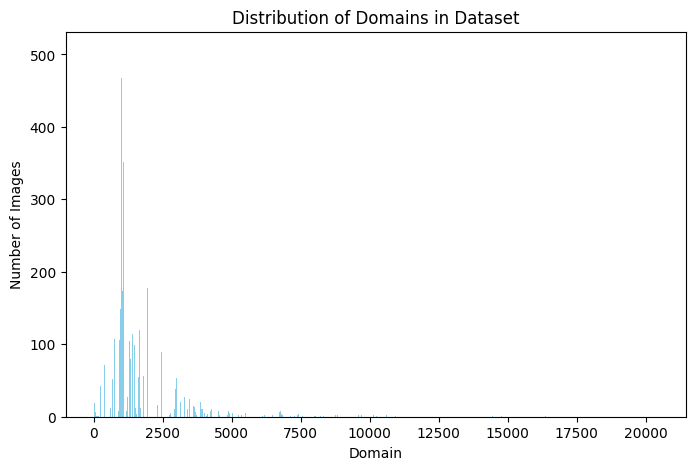

In [36]:
domain_counts = Counter([ann["area"] for ann in annotations["annotations"]])

plt.figure(figsize=(8, 5))
plt.bar(domain_counts.keys(), domain_counts.values(), color="skyblue")
plt.xlabel("Domain")
plt.ylabel("Number of Images")
plt.title("Distribution of Domains in Dataset")
plt.show()


In [37]:
import json
import pandas as pd

# Read Source Dataset
with open("/Users/sakuramomoko/Desktop/Fish_counting/cfc_train.json", "r") as f:
    source_data = json.load(f)

# Extract category information
categories = source_data["categories"]
annotations = source_data["annotations"]

# View Category
print(f"Total Categories: {len(categories)}")
for cat in categories:
    print(f"Category ID: {cat['id']}, Name: {cat['name']}")

# Count the number of all labeled categories
category_counts = pd.DataFrame(annotations)["category_id"].value_counts()
print(category_counts)


Total Categories: 1
Category ID: 1, Name: fish
category_id
1    132010
Name: count, dtype: int64


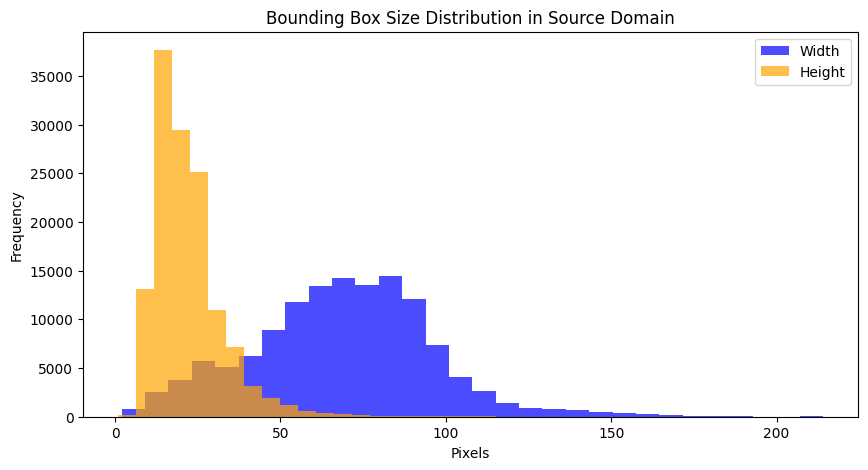

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Extract bbox width and height
bbox_dims = np.array([(ann["bbox"][2], ann["bbox"][3]) for ann in annotations])

# Plot bbox size distribution
plt.figure(figsize=(10,5))
plt.hist(bbox_dims[:,0], bins=30, alpha=0.7, label="Width", color="blue")
plt.hist(bbox_dims[:,1], bins=30, alpha=0.7, label="Height", color="orange")
plt.legend()
plt.xlabel("Pixels")
plt.ylabel("Frequency")
plt.title("Bounding Box Size Distribution in Source Domain")
plt.show()


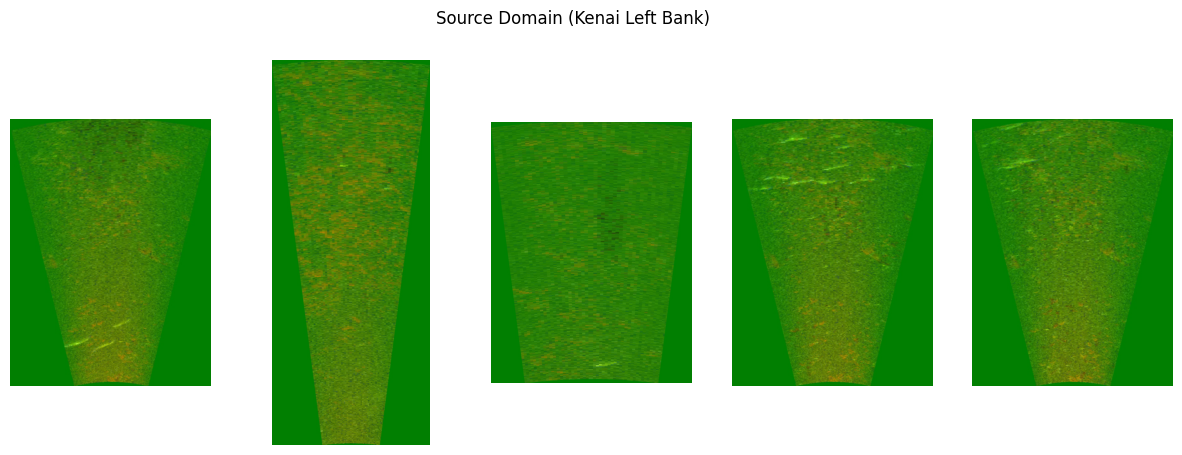

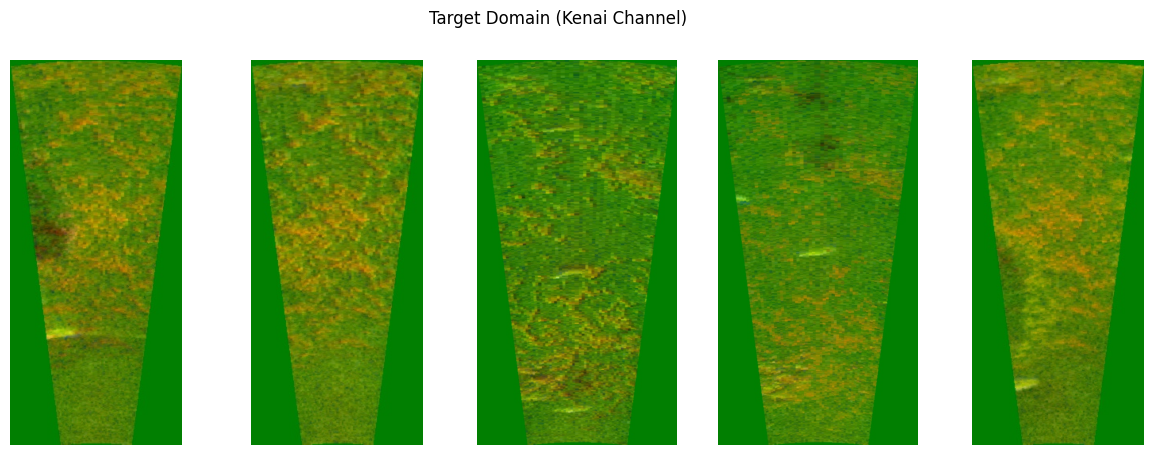

In [40]:
import cv2
import random

image_dir = "/Users/sakuramomoko/Desktop/Fish_counting/cfc_train/"
target_image_dir = "/Users/sakuramomoko/Desktop/Fish_counting/cfc_channel_test/"

def show_random_images(dir, images_df, title, num=5):
    fig, axes = plt.subplots(1, num, figsize=(15, 5))
    sample_images = random.sample(list(images_df["file_name"]), num)

    for i, img_name in enumerate(sample_images):
        img_path = dir + img_name
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axes[i].imshow(img)
        axes[i].axis("off")

    plt.suptitle(title)
    plt.show()

# Show Source and Target comparison
show_random_images(image_dir, pd.DataFrame(source_data["images"]), "Source Domain (Kenai Left Bank)")
show_random_images(target_image_dir, pd.DataFrame(target_data["images"]), "Target Domain (Kenai Channel)")
